In [1]:
import scienceplots
import matplotlib.pyplot as plt

import matplotlib.colors as colors
from matplotlib.patches import Patch
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

plt.style.use("science")

In [2]:
X = np.load("../data/normalised_objs.npy")
encoded = np.load("../data/encoded_objs.npy")
decoded = np.load("../data/decoded_objs.npy")

recon_losses = np.sum((X - decoded)**2, axis=1)
del decoded, X

In [3]:
data = pd.read_csv("../../dp03/dp03_objects.csv")
# Clean
data["a"] = data["q"]/(1 - data["e"])

clean_objs = data.dropna()
clean_objs = clean_objs.drop(columns=["ssObjectId", "fullDesignation", "q2", "e2", "Unnamed: 0"])

clean_objs["i-z"] = clean_objs["i_H"] - clean_objs["z_H"]
clean_objs["g-r"] = clean_objs["g_H"] - clean_objs["r_H"]
clean_objs["r-i"] = clean_objs["r_H"] - clean_objs["i_H"]

clean_objs["a*"] = .89*(clean_objs["g-r"]) + .45*(clean_objs["r-i"]) -.57

clean_objs["a"] = clean_objs["q"]/(1-clean_objs["e"])

clean_objs["Q"] = clean_objs["a"]*(1 + clean_objs["e"])
clean_objs["T_jup"] = (5.204/clean_objs["a"]) + 2*np.cos((clean_objs["incl"]/180)*np.pi)*np.sqrt((clean_objs["a"]/5.204)*(1 - clean_objs["e"]**2))

print((len(data) - len(clean_objs))/len(data)) # Dropped

0.30126084082016896


In [4]:
nn = NearestNeighbors(n_neighbors=20).fit(encoded)

In [5]:
anoms = []

for obj in np.argsort(recon_losses)[-10::][::-1]:
    kn_idx = nn.kneighbors([encoded[obj]])
    
    anoms.append(
        kn_idx[1][0]
    )
    
#iso_index = np.argsort(recon_losses)[-20::][::-1][5]

#kn_idx = nn.kneighbors([encoded[iso_index]])

In [6]:
print(data.loc[clean_objs.iloc[np.argsort(recon_losses)[-10::][::-1], :].index, :]["fullDesignation"])

1425257     2011 S0000mXTa
2335387     2011 S0000qYqa
866937      2011 S00015fxa
1130166     2011 S102qW9Ma
838704      2011 S0000sEwa
3361266    2011 iso0007163
1369289      2011 LPCC3251
2748717      2011 LPCD1330
4344516      2011 LPCC2991
3938451     2011 S10cb6d8a
Name: fullDesignation, dtype: object


In [7]:
df = pd.DataFrame(
    encoded,
    columns = [f"AE {i}" for i in range(1,7)]
)

df["cluster"] = 0
for i, clst_idx in enumerate(anoms):
    df.loc[clst_idx, "cluster"] = i + 1

/Users/br/Desktop/lsst_ad_git/ad_lsst/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_6158/2268845023.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


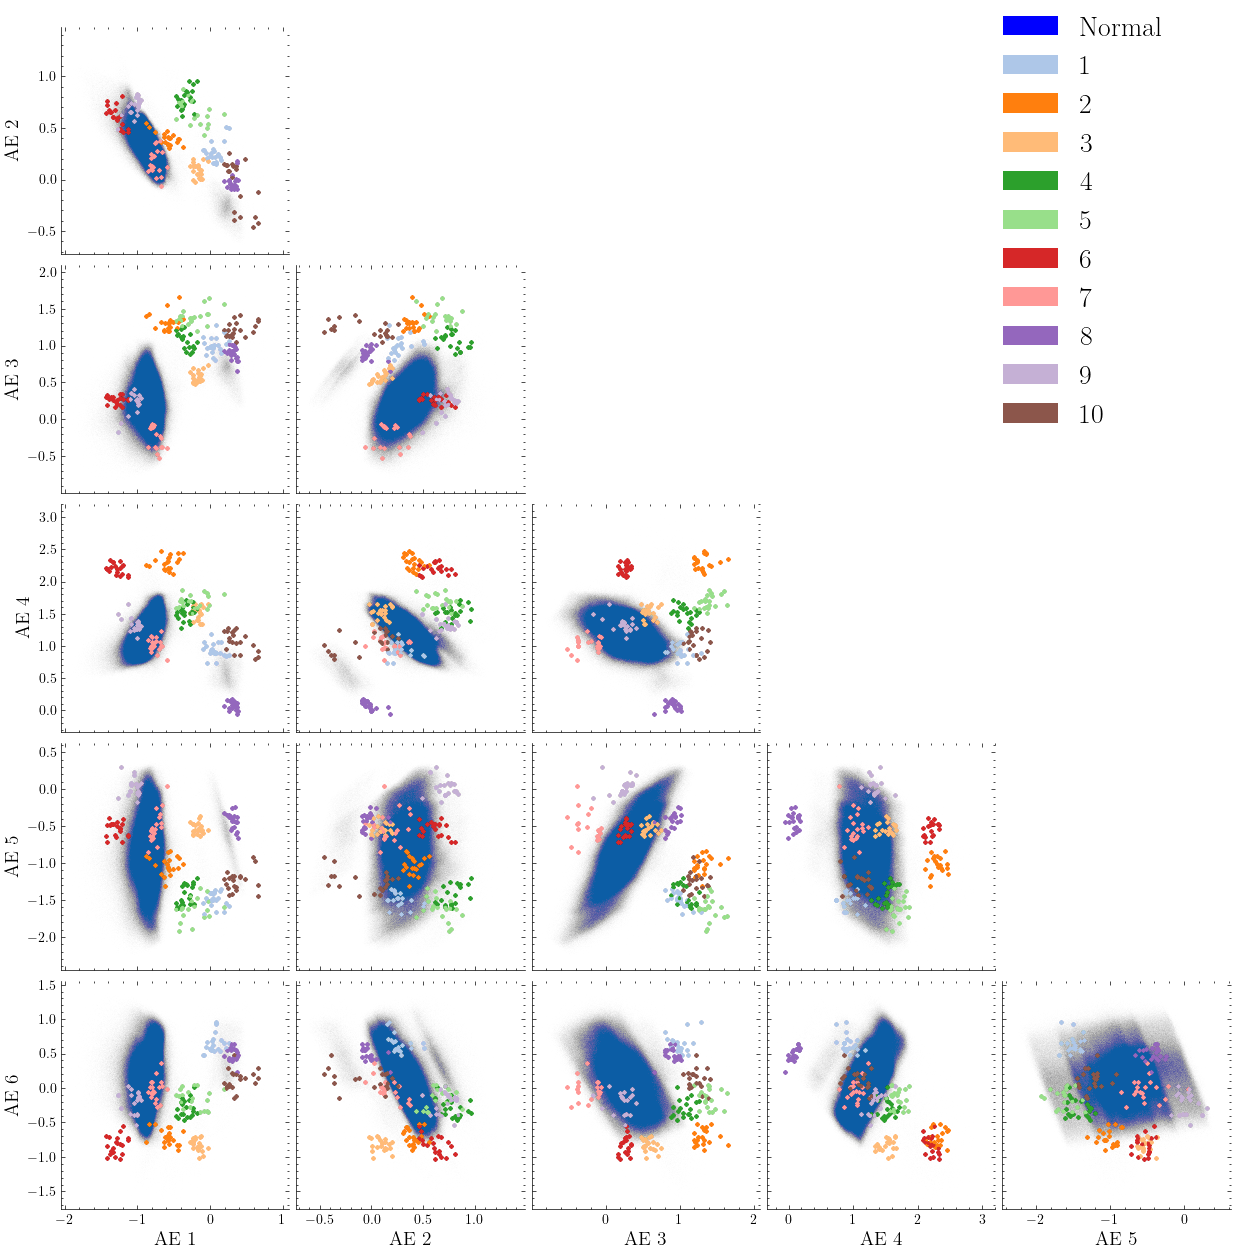

In [8]:
values = np.arange(11)

# Choose a discrete color palette
colors = plt.cm.tab20(values)[1:]

pp = sns.pairplot(
    df[[f"AE {i}" for i in range(1,7)]],
    plot_kws={
        "s":0.01, 
        "alpha":0.15,
        },
    corner=True,
    diag_kind=None
)

legend_elements = [Patch(facecolor=color,
                         label=f'{i + 1}') for i, color in enumerate(colors)]
legend_elements = [Patch(facecolor="blue", label=f'Normal')] + legend_elements
pp.fig.legend(handles=legend_elements, bbox_to_anchor=(0.8, .85), fontsize=20)

for ax in pp.axes.flat:
    for _, (clst_idx, color) in enumerate(zip(anoms, colors)):
        for i, axs in enumerate(pp.axes):
            for j, ax in enumerate(axs):
                if ax:
                    if i != j:
                        ax.scatter(
                            df.iloc[clst_idx, j],
                            df.iloc[clst_idx, i],
                            s=2,
                            c=color
                        )
                        ax.set_xlabel(f"AE {j + 1}", fontsize=14)
                        ax.set_ylabel(f"AE {i + 1}", fontsize=14)
                    elif i == j:
                        ax.set_visible(False)
                    else:
                        pass
plt.show()

Cluster analysis

In [15]:
# Clusters
clean_objs.iloc[df[df["cluster"] == 1].index, :]

flags    g_Chi2        g_G12      g_G12Err        g_H       g_HErr  \
692743      66  1.990501   -44519.824  1.089637e+10  34.530940   268733.940   
796699      66  1.627603   -54033.477  1.956155e+10  35.699330   397338.840   
1086842     66  1.022140   -26485.957  1.390474e+10  35.739967   575679.000   
1425257     66  2.243613  -333798.120  2.729585e+11  37.928547   902058.700   
1477432     66  1.493266    -4755.398  1.858375e+08  37.958256    42918.133   
1548328     66  1.544728  -150655.030  3.475058e+10  34.621380   252681.980   
1969154     66  1.113301   -61379.890  2.122702e+10  38.231632   379366.340   
2096646     66  1.929318  -292911.500  1.831025e+11  37.312520   686381.500   
2210301     66  0.770443   -24007.418  7.793333e+09  33.832245   355903.120   
2375394     66  1.480228  -178672.800  7.247225e+10  37.602510   444498.280   
2876813     66  0.563655  -155863.030  1.728001e+11  42.254063  1216062.600   
2955221     66  1.039818   -62596.246  2.605977e+10  34.598000   456495.400   
3009913     66  2.376375  -119526.890  2.435936e+10  35.559160   224008.840   
3067236     66  0.807704  -112168.266  3.983356e+10  37.633755   389330.440   
3158428     66  1.389298  -180549.330  7.818899e+10  37.111317   475606.100   
3272651     66  1.020321  -153654.500  7.497753e+10  37.269478   537484.400   
3283564     66  0.766908  2886465.800  8.853853e+11  38.094147   336167.530   
3951460     66  0.652224  -149220.700  4.548141e+10  34.534900   336132.500   
4082739     66  0.421167  -337194.000  3.830899e+11  45.602300  1246458.100   
4306920     66  1.676573  -581659.300  9.056705e+11  36.925182  1713262.600   

           i_Chi2         i_G12      i_G12Err        i_H  ...        peri  \
692743   0.672312 -6.694786e+04  1.796305e+10  34.375830  ...  183.974772   
796699   1.412805 -5.778888e+04  7.836522e+09  34.157730  ...  240.560361   
1086842  0.826025 -5.891512e+04  3.385162e+10  38.533005  ...  148.577540   
1425257  0.959236  7.564598e+07  1.007162e+14  38.299760  ...  159.466041   
1477432  1.547067 -7.277598e+04  2.407517e+10  38.666378  ...  112.077368   
1548328  0.718896 -6.835995e+04  2.768285e+10  36.080600  ...  107.938080   
1969154  0.775059 -7.889354e+04  9.799811e+09  36.340710  ...  247.640300   
2096646  1.087527 -2.742479e+05  6.052812e+10  35.390785  ...  150.175928   
2210301  1.426785 -1.904065e+05  4.865623e+10  35.230675  ...  201.574454   
2375394  0.772783 -2.798135e+04  6.957837e+09  35.593334  ...  190.946546   
2876813  1.125800 -2.093486e+04  4.946637e+09  33.451900  ...  164.262069   
2955221  0.975986 -9.723580e+04  3.247733e+10  34.195347  ...  190.792125   
3009913  0.722883 -9.817551e+04  3.909270e+10  35.198986  ...  139.289139   
3067236  2.802304 -3.836631e+05  1.962998e+11  37.219013  ...  183.400335   
3158428  1.020188 -1.500510e+05  5.723311e+10  35.190704  ...  190.917764   
3272651  1.045180  4.870843e+05  2.382763e+10  38.014812  ...  136.890292   
3283564  1.853458 -4.815554e+05  9.653095e+10  35.650852  ...  167.289480   
3951460  0.895451  1.168512e+06  7.317672e+11  35.635315  ...   95.800665   
4082739  0.726265 -8.556667e+04  1.015068e+10  35.776860  ...  173.704391   
4306920  2.784220 -2.775859e+05  7.626311e+10  39.647003  ...  120.518943   

               node    mpcH         a        i-z        g-r        r-i  \
692743   205.908810  22.760  2.671690  10.863581  13.317655 -13.162545   
796699   148.112920  22.900  2.536407  12.648107  15.590306 -14.048706   
1086842  151.978220  23.390  2.424180  16.899483  13.595983 -16.389021   
1425257  161.783993  23.586  2.247486  16.344300  12.696317 -13.067530   
1477432  278.934190  24.840  2.281672  12.634666  14.290255 -14.998377   
1548328  208.260480  21.940  3.107616  15.712040  13.403177 -14.862397   
1969154  142.624280  24.500  2.353297  12.657248  12.015510 -10.124588   
2096646  189.506230  22.690  2.477678  11.285827  14.994863 -13.073128   
2210301  214.863480  22.780  2.663105  13.307781  11.612066 -13.0

In [19]:
clean_objs.iloc[df[df["cluster"] == 2].index, :]#["i_Ndata"]

flags    g_Chi2       g_G12     g_G12Err        g_H    g_HErr  \
3454        66  0.696212    7.879366    22.246277  25.119251  1.427689   
127746      66  0.987272    3.136118     9.091966  26.448390  3.209720   
185649      66  0.207243    2.774341     9.112609  24.226028  1.114877   
254305      66  0.481997    7.690316    11.914566  24.688108  2.890967   
356631      66  0.325489    1.341302     3.512716  26.032913  1.315452   
435532      66  1.523457    0.587364     8.380318  22.814281  1.436317   
487629      66  0.654853    4.556802     2.085131  22.468704  2.074965   
518959      66  1.757976    3.990483     3.494548  23.113407  0.938199   
785799      66  0.941937    0.200003    11.156657  24.292265  1.537905   
1591886     66  1.134506    6.233612    11.371119  24.788643  0.947694   
1848365     66  0.608829   19.402338     0.942083  24.813010  1.590559   
1866538     66  1.408739    8.234332    73.389090  23.582827  5.186626   
2049937     66  1.476205    7.921208     4.224485  24.665329  1.663916   
2335387     66  0.616859  164.056080  1117.274800  26.817140  5.043162   
2625204     66  1.275838    6.434962    18.908432  26.613297  1.454535   
2742664     66  0.549611    1.499840     8.902628  25.218817  0.754730   
2774673     66  0.922676    0.353821    12.494467  28.033096  1.257010   
2932476     66  1.416594   -1.504089     5.768258  23.885778  0.899466   
2974941     66  0.649109    0.511014     9.243468  25.960820  1.649912   
3143266     66  1.697227   -0.720995     4.828077  23.352710  2.008752   

           i_Chi2        i_G12      i_G12Err        i_H  ...        peri  \
3454     1.056414  -134009.780  2.179886e+10  35.822216  ...  123.010690   
127746   1.808763   -18392.432  4.587357e+09  35.673830  ...  189.764461   
185649   0.798427   -23642.875  3.034474e+09  33.059140  ...  124.777706   
254305   0.495501   -46293.020  2.001779e+09  35.582108  ...  132.185678   
356631   1.205158    57987.316  8.816113e+08  34.212585  ...  135.093042   
435532   0.389248   -33555.860  3.479006e+09  36.953583  ...   53.382594   
487629   0.984922  -106977.530  3.568927e+10  36.130720  ...   76.277885   
518959   0.638605  -322508.620  6.902152e+10  36.415240  ...  138.163702   
785799   2.048177  -101453.830  7.330300e+09  36.322370  ...  157.391881   
1591886  1.928092   -23141.262  4.920405e+08  33.155617  ...  121.770387   
1848365  1.578239   -27475.549  4.981547e+09  33.899280  ...   62.575951   
1866538  2.264159   -74514.460  1.234541e+10  34.354267  ...  113.091481   
2049937  0.470422  4381609.500  1.056366e+12  36.103820  ...  170.490155   
2335387  0.544004  -109042.125  4.172621e+10  35.699160  ...   74.935338   
2625204  1.178390   -14694.809  1.007615e+09  35.780426  ...   93.685357   
2742664  1.692810   -56446.133  4.549180e+09  34.566610  ...   76.142191   
2774673  1.653898   -30068.010  5.151922e+09  40.755558  ...   59.456933   
2932476  1.080772   -76743.090  2.737305e+10  35.728302  ...   63.740421   
2974941  0.626856   -20610.568  7.170538e+09  32.252857  ...   64.087774   
3143266  0.662077   -19749.828  7.456082e+08  33.063026  ...   89.658761   

               node    mpcH         a       i-z        g-r        r-i  \
3454     115.245417  23.012  2.767427  0.660950  -7.553009  -3.149956   
127746   146.875258  24.622  1.603284 -2.394007  -9.397214   0.171774   
185649   218.702200  22.450  2.696946 -3.257250  -9.495142   0.662030   
254305   153.794560  24.670  2.340427 -2.625432  -2.464872  -8.429128   
356631   215.257702  24.415  2.545987  1.191925  -7.392719  -0.786953   
435532   147.060341  24.727  2.140422  2.514279  -2.291768 -11.847534   
487629   104.277640  23.840  2.725668 -1.084395  -1.231962 -12.430054   
518959   200.316360  22.700  2.750362 -0.162030  -8.866806  -4.435027   
785799   209.866940  23.900  2.602282 -0.434485 -10.431815  -1.598290   
1591886  175.609770  22.700  2.656804 -1.135006 -10.118677   1.751703   
1848365  188.619620  23.570  2.562665  0.187760  -8.14

In [21]:
pd.set_option('display.max_columns', None)
clean_objs.iloc[df[df["cluster"] == 3].index, :]

flags    g_Chi2      g_G12    g_G12Err        g_H     g_HErr  \
248357      66  1.637456   8.217428    0.495638  21.502617   1.280623   
696957      66  0.477884  18.383080    0.000526  22.998215   2.532086   
866937      66  1.174819  12.806751  180.343610  22.491837   7.069588   
973237      66  1.080356   6.391009   10.242286  22.201930   0.922944   
1052744     66  1.762943   3.555228    0.230597  23.292473   1.503996   
1174114     66  0.895113   3.715683    5.704670  23.437859   1.727846   
1259861     66  1.281767   2.130451   26.047415  23.612669   1.919562   
1433573     66  1.022833   3.745059    0.007458  23.498537   2.725694   
1585029     66  0.553886   0.200006   17.572586  21.929160   3.205799   
1587329     66  1.528781  11.128946    7.272621  22.411450   1.366206   
1689332     66  0.665756   5.526265    1.362962  21.988466   0.810608   
2119682     66  0.250871  10.450897    0.156572  22.979223   0.775755   
2178230     66  1.757961   9.892324    0.891614  21.871933   1.056416   
2315086     66  0.739376   9.271958    4.200578  21.832950   3.758259   
2665033     66  0.793851   4.956105    0.021450  19.187168   1.676653   
2723613     66  2.218218   6.490317   11.198100  23.612764   2.079807   
3395787     66  1.097481   0.199801   22.000406  26.539608  14.420345   
3519557     66  1.194845   6.919816   12.562662  23.728552   1.064442   
4189094     66  1.064687  17.773645    8.631022  24.554615   1.321191   
4220993     66  0.987435   6.117606    5.548382  23.058567   0.876641   

           i_Chi2      i_G12   i_G12Err        i_H    i_HErr  i_Ndata  \
248357   0.602954   0.681441  17.785870  21.292627  1.801409        9   
696957   1.078423   3.572740   0.030220  22.881565  1.217549       21   
866937   0.536540   0.200023  19.665094  24.187998  2.199456       15   
973237   1.796123   4.521613   3.423676  21.413055  0.555152       33   
1052744  0.392313   1.852016  14.166858  24.027690  6.151312       15   
1174114  1.184940   3.890409   1.245391  23.155730  0.996971       25   
1259861  1.122956   2.757535   7.132461  21.612146  0.927246       10   
1433573  0.796393   2.889563   2.192812  24.086834  1.545424       15   
1585029  1.233811  -5.433080  34.015650  24.071964  4.531475       17   
1587329  0.345089   5.890657   0.162523  22.194283  1.160791        8   
1689332  0.598789   8.293128   0.715265  19.940708  0.865446       17   
2119682  0.284979   1.206206   4.434882  22.872650  0.633238       11   
2178230  1.407832   4.534492   3.839931  20.225225  1.288360       13   
2315086  0.863709   1.651020  16.124500  22.979675  1.431785        9   
2665033  1.063811   4.917788   4.444394  22.559536  1.048921       17   
2723613  1.295731   4.078382   5.214058  22.687523  1.337951       20   
3395787  1.115657   2.396862   0.152742  23.077414  2.153430       12   
3519557  1.430266   3.609156   4.686358  22.373623  0.832540       10   
4189094  0.912330  10.584921  14.883904  22.338543  0.990474       13   
4220993  0.950810   6.393779   0.478013  21.386417  0.752473       17   

           r_Chi2         r_G12      r_G12Err        r_H      r_HErr  \
248357   1.195912 -4.468206e+04  1.261640e+10  34.089275  309341.280   
696957   0.709759 -6.762988e+04  5.368974e+09  36.945045   87268.940   
866937   1.058182  1.315296e+07  2.481064e+12  40.837720  207689.340   
973237   1.188575 -1.352850e+05  2.786243e+10  34.753853  226118.380   
1052744  0.987201 -2.589623e+03  2.080109e+08  33.770287   87974.010   
1174114  1.083713 -1.015783e+04  1.738862e+09  34.829872  188027.300   
1259861  2.031376 -4.404400e+04  1.211688e+10  35.102608  301695.780   
1433573  1.426064 -2.467634e+05  4.579831e+10  37.739376  204403.250   
1585029  1.739923 -1.841215e+05  3.329177e+10  37.014310  198932.080   
1587329  0.838843 -1.792044e+05  6.342169e+10  36.721890  388659.750   
1689332  1.452390 -2.487626e+04  2.867106e+09  33.013874  126368.640   
2119682  1.307339 -2.003032e+04  5.926085e+09  35.069485  324683.470   
21782

In [22]:
clean_objs.iloc[df[df["cluster"] == 4].index, :]

flags    g_Chi2         g_G12      g_G12Err        g_H      g_HErr  \
208677      66  2.239158 -1.182120e+05  7.166474e+10  35.963640   664668.20   
794924      66  0.743882 -2.552227e+04  4.503162e+09  35.560350   193646.33   
1130166     66  1.727880  1.490671e+07  1.055986e+13  38.273540   782556.10   
1183695     66  2.927372 -1.028457e+05  7.017847e+10  37.944460   748655.44   
1188809     66  0.329347 -5.590771e+05  3.314532e+11  36.055275   651728.56   
1256210     66  1.406143 -1.900294e+05  2.840212e+10  37.620274   163905.05   
1402375     66  0.784764 -5.443144e+05  3.540513e+11  40.185460   712675.80   
1564618     66  0.894544 -2.817249e+05  3.444543e+11  36.945220  1339925.80   
1822335     66  0.538339 -9.530716e+04  6.620560e+10  35.234715   761483.30   
2202343     66  1.456165 -2.891351e+04  5.868838e+09  34.376507   223018.40   
2235702     66  1.394742 -4.800060e+05  1.956502e+11  37.044410   446682.60   
2338378     66  1.600805  1.691288e+06  5.232902e+11  35.645780   339989.22   
2461312     66  1.536102 -3.786872e+04  9.368396e+09  38.366680   272349.28   
2759264     66  1.222705 -3.243472e+04  7.611110e+09  36.142128   258302.73   
3580651     66  2.660341 -5.498945e+04  2.574834e+10  33.871580   514805.44   
3614370     66  1.098409 -7.538234e+04  1.285042e+10  34.724133   186791.80   
3954987     66  1.413328 -1.236768e+05  7.262716e+10  37.173473   643160.56   
4065590     66  1.353725 -8.998185e+04  4.139743e+10  37.338127   503832.34   
4092929     66  1.077082 -1.092624e+05  1.470038e+10  35.216183   147736.14   
4260337     66  0.562146 -1.975281e+05  7.818498e+10  37.969418   434522.16   

           i_Chi2          i_G12      i_G12Err        i_H         i_HErr  \
208677   1.137818   -2351.811300  1.576422e+07  31.332031    7342.965300   
794924   1.058899   -4936.914600  8.645957e+07  31.456080   19217.740000   
1130166  0.670586      -7.692984  4.259269e+01  24.092140       4.257637   
1183695  1.305681  -48018.848000  2.286265e+09  32.960537   52230.645000   
1188809  1.335778      13.407831  1.600538e-02  26.500961       1.086824   
1256210  1.700831  -21461.730000  1.607803e+09  33.540900   82268.930000   
1402375  0.837110       0.340698  1.006843e+01  22.987864       1.253550   
1564618  1.731857       4.230101  9.808903e-01  22.805637       0.952692   
1822335  1.189483      -7.265253  3.059487e+02  25.868880      36.109604   
2202343  1.304113  -39683.560000  2.099641e+09  33.082153   57967.020000   
2235702  1.464472  -30956.744000  2.919852e+09  33.300400  103504.720000   
2338378  1.093399      23.092230  3.410307e+01  25.226358       1.001526   
2461312  0.721738       2.633492  1.792920e+01  25.998169       2.919168   
2759264  0.891289  -11383.853000  4.427789e+08  33.106920   42717.090000   
3580651  0.518842  -29253.908000  1.504102e+09  32.126995   56327.047000   
3614370  0.960036  -71003.370000  7.209933e+09  34.050620  111233.640000   
3954987  1.738063      -0.630957  9.564203e+00  23.633707       4.975752   
4065590  0.628039      -0.805888  9.400877e+00  23.773705       4.506788   
4092929  1.050116 -104923.250000  7.113369e+09  33.892810   74333.750000   
4260337  1.041497  -38576.277000  1.546860e+09  34.692110   44178.490000   

         i_Ndata    r_Chi2      r_G12   r_G12Err        r_H    r_HErr  \
208677        16  1.327771   3.173234   4.083545  22.887478  1.407584   
794924        46  0.771772  11.854633   3.074758  23.315660  0.493633   
1130166       10  1.474285   0.200004   6.611421  21.651430  1.151594   
1183695       24  1.410788   2.768336   4.876493  22.292320  0.618494   
1188809       44  0.932833   0.200004  33.040043  24.277235  7.275484   
1256210       21  0.935313  -0.168953   0.868787  22.901283  0.278238   
1402375       22  0.591015  17.609316   1.035546  23.804716  0.754810   
1564618       15  1.006607   3.358380   3.333394  23.595472  1.023938   
1822335       22  0.985081   2.796683  11.981234  23.647852  1.220281   
2202343       18  0.92

In [23]:
clean_objs.iloc[df[df["cluster"] == 5].index, :]

flags    g_Chi2         g_G12      g_G12Err        g_H      g_HErr  \
48818       66  0.534308 -5.917453e+04  1.430775e+10  37.283090   267326.78   
476512      66  0.458741  3.125877e+06  6.673285e+12  35.438694  2345635.20   
485019      66  2.024300 -3.247138e+05  1.749493e+11  36.935432   591552.56   
493419      66  1.670942 -6.641757e+05  6.395275e+11  39.119650  1054348.00   
838704      66  0.546976  1.102442e+07  1.296498e+13  35.727670  1290929.00   
946942      66  3.154155  4.332623e+05  1.152227e+11  40.091390   294219.60   
1000566     66  1.093493 -6.187088e+04  1.179347e+10  36.049330   209193.08   
1830426     66  1.425555 -2.612271e+05  2.721882e+11  37.778625  1148269.80   
2227733     66  0.736092 -6.880295e+04  2.336998e+10  40.393204   372947.28   
2256238     66  1.515033 -8.325723e+04  3.964094e+10  38.791447   523684.20   
2259962     66  0.977015  3.328259e+06  1.563556e+12  36.794216   515699.53   
2554369     66  1.397527 -2.354128e+05  1.705576e+11  34.093460   793079.70   
2567125     66  1.209810 -5.848414e+05  3.972751e+11  41.377340   743853.00   
2776000     66  0.644139 -2.867594e+05  2.312490e+11  36.074840   889987.06   
3463069     66  1.698461 -1.181290e+05  4.018881e+10  37.417580   372784.70   
3659312     66  1.440433  5.937804e+06  2.889196e+12  39.663227   537415.10   
3682298     66  0.836457  3.652722e+05  2.319733e+11  37.252197   700365.50   
3691296     66  1.324184 -4.283245e+05  4.512863e+11  39.173798  1158031.50   
3825673     66  0.910537 -1.117695e+05  2.161929e+10  34.658455   212492.88   
4254129     66  0.557975 -4.527888e+04  1.684062e+10  41.227158   408594.78   

           i_Chi2        i_G12      i_G12Err        i_H      i_HErr  i_Ndata  \
48818    1.169394   -75225.160  2.882450e+10  33.995830   421506.22       12   
476512   1.013945   681164.500  1.819106e+11  35.366272   294536.00       10   
485019   1.715055  -245416.900  8.292031e+10  36.970890   371532.44        9   
493419   0.770194  -224612.890  5.326965e+10  36.977040   259869.03       10   
838704   0.445565  3830514.000  1.590252e+12  37.993730   456033.30        5   
946942   2.013715  -156188.080  1.501890e+11  35.848377  1058514.90        6   
1000566  0.580191  -295918.970  9.800963e+10  35.887770   362778.50       16   
1830426  1.004924   -77865.370  9.905627e+09  36.183860   140421.72       19   
2227733  0.835209   -27262.879  5.688019e+09  33.970460   230108.98       26   
2256238  0.976424   -11592.851  7.685816e+08  35.672220    72898.56       11   
2259962  1.618061   -77534.770  4.111114e+10  34.421627   583215.80        7   
2554369  1.779200  -172533.780  7.158932e+10  32.523800   455644.88        7   
2567125  0.726048   -14536.251  1.983464e+09  33.785275   149532.33       20   
2776000  0.820257  -202764.140  8.327469e+10  36.076668   454164.20       25   
3463069  0.930520   -37228.086  1.293742e+10  34.404290   381287.12       11   
3659312  1.976636  1176635.600  3.806258e+11  37.414520   358993.30       23   
3682298  0.519297  -248189.800  5.193746e+10  36.509403   230945.84       18   
3691296  1.009054   -98835.560  8.321704e+09  36.535900    92616.30       19   
3825673  1.177781  -204747.800  6.389674e+10  38.536633   343266.88       17   
4254129  1.210185   -10645.388  1.570845e+09  34.707470   163264.62       37   

           r_Chi2         r_G12      r_G12Err        r_H         r_HErr  \
48818    1.553680  3.367796e+00  1.448788e+00  24.601357       1.383134   
476512   1.493089  2.703025e+05  3.135164e+10  34.714160  127773.790000   
485019   0.272490 -5.077230e-01  7.943921e+00  23.000734       3.480039   
493419   0.994400 -8.677765e-01  7.584564e+00  25.989160       3.419752   
838704   0.649993 -1.075728e+04  2.875895e+08  30.677190   29297.818000   
946942   1.252188  1.788464e+06  2.734953e+11  37.508316  168827.580000   
1000566  1.507029 -4.238227e+03  1.237887e+08  31.334814   32064.291000   
1830426  0.607634  4.153211e+00  2.006303e+00  24.046186       1.413

In [26]:
clean_objs.iloc[df[df["cluster"] == 10].index, :]

flags    g_Chi2          g_G12      g_G12Err        g_H  \
104881      66  0.899406 -341387.160000  2.498788e+11  38.219040   
615842    2114  1.148757      55.657726  1.315418e+02  28.838821   
884025      66  1.927554   -4655.166000  1.972120e+09  40.040550   
1058549   2114  1.238892       5.558742  1.036118e+01  23.738276   
1625147     66  1.373680  -76353.310000  2.416536e+10  36.975708   
2226418     66  1.587133 -417848.470000  3.169982e+11  34.993618   
2554344     66  0.694146  -85314.414000  1.774977e+10  36.427654   
2671142   2114  1.203739       9.701193  2.194556e-04  24.308092   
2900157     66  0.589963 -765694.300000  8.360791e+11  39.547104   
3011264     66  0.709777  -24793.890000  1.354619e+09  37.475647   
3115827   2114  0.296883       1.564085  1.192993e+01  23.155235   
3163199   2114  1.474565 -763889.700000  5.700994e+11  38.261612   
3213075     66  0.789608  -34981.992000  2.741814e+10  34.429077   
3529044     66  0.646809  -34344.996000  4.576649e+09  37.737324   
3608306     66  1.751225  -23779.428000  3.978882e+09  34.682613   
3832419   2114  0.207869      10.247574  2.092554e+00  24.744644   
3861637   2114  0.537506      -0.759307  1.071331e+01  24.184938   
3938451   2114  1.463088  -40694.630000  6.132238e+09  40.273132   
3998482     66  1.972916  -48770.816000  8.069285e+09  35.850410   
4054080     66  0.616807 -183272.140000  1.002613e+11  36.796757   

               g_HErr    i_Chi2         i_G12      i_G12Err        i_H  \
104881   8.050334e+05  0.800775 -8.093015e+04  1.271962e+10  37.920116   
615842   2.269747e+00  0.347762  2.887142e+07  3.402642e+13  37.108288   
884025   4.672897e+05  1.097697 -2.215615e+04  9.060488e+09  38.487500   
1058549  1.670051e+00  1.175041 -8.657574e+04  9.322144e+09  35.605038   
1625147  3.474468e+05  0.569005 -3.861373e+05  1.501240e+11  39.579730   
2226418  8.382416e+05  0.675385 -2.586181e+05  1.010888e+11  35.131725   
2554344  2.281727e+05  0.486915 -7.074669e+04  1.966789e+10  36.346294   
2671142  1.755767e+00  1.037869 -6.172319e+04  8.336627e+09  35.092740   
2900157  1.197674e+06  1.935119  7.372268e+04  1.386330e+09  36.241130   
3011264  6.000131e+04  1.449192 -7.988212e+04  1.542675e+10  36.450214   
3115827  1.367835e+00  0.827430 -3.947705e+04  4.499319e+09  36.638180   
3163199  8.177098e+05  0.734485 -6.708091e+05  4.825228e+11  35.660250   
3213075  8.587312e+05  1.801134 -1.977847e+04  2.802686e+09  35.659515   
3529044  1.463752e+05  1.105308  5.293949e+05  1.622537e+11  38.121506   
3608306  1.836868e+05  3.018282 -9.801379e+04  5.364313e+10  35.566750   
3832419  1.505068e+00  1.043965 -2.059222e+05  1.040409e+11  37.306087   
3861637  4.397489e+00  0.818530 -2.460713e+05  6.929906e+10  33.410110   
3938451  1.664373e+05  2.624219 -8.236306e+05  7.604047e+11  37.091736   
3998482  1.820569e+05  1.205175 -1.612156e+05  5.351737e+10  35.969265   
4054080  5.993657e+05  0.808579 -9.797104e+04  3.020631e+10  35.556618   

              i_HErr  i_Ndata    r_Chi2          r_G12      r_G12Err  \
104881    172977.580       15  0.917679 -130572.890000  2.502924e+10   
615842   1291711.900        7  0.712235 -146114.730000  7.588301e+10   
884025    449895.970       12  0.719467  -37263.484000  2.479470e+10   
1058549   118403.010       21  0.989703       3.764247  9.178320e+00   
1625147   427016.400       12  0.972345 -110686.620000  1.693831e+10   
2226418   429653.300       16  0.483176  259454.810000  2.390577e+10   
2554344   304520.440       14  0.894189  -18073.373000  2.730281e+09   
2671142   148126.730       10  0.623271       2.513962  3.803049e+00   
2900157    20757.898       15  0.480963 -539389.700000  2.275201e+11   
3011264   212017.600       13  1.452763 -116241.720000  3.031127e+10   
3115827   125144.130        7  0.770193      -3.248267  6.659164e+01   
3163199   787334.100        5  1.211188 -261943.000000  6.257177e+10   
3213075   155672.120        8  0.983192  -15211.974000  3.716898e+09   
3529044   338325.

ISO CLUSTER

In [10]:
pca = PCA(n_components = 3).fit_transform(
    encoded
)

In [11]:
data.loc[clean_objs.iloc[df[df["cluster"] == 6].index, :].index, :]["fullDesignation"].values

array(['2011 iso0008344', '2011 iso0009562', '2011 iso0011744',
       '2011 iso0003881', '2011 iso0005656', '2011 iso0004241',
       '2011 iso0005446', '2011 iso0002825', '2011 iso0004426',
       '2011 iso0006105', '2011 iso0008753', '2011 iso0007163',
       '2011 iso0008578', '2011 iso0009027', '2011 iso0010296',
       '2011 iso0009979', '2011 iso0009620', '2011 iso0001107',
       '2011 iso0006907', '2011 iso0000068'], dtype=object)

/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_6158/2545382898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clst6["rl"] = recon_losses[df[df["cluster"] == 6].index]
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_6158/2545382898.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clst6["name"] = data.loc[clean_objs.iloc[df[df["cluster"] == 6].index, :].index, :]["fullDesignation"].values
/var/folders/44/yjf9jwgd1bqfct8dx076vwqm0000gn/T/ipykernel_6158/2545382898.py:7: SettingWit

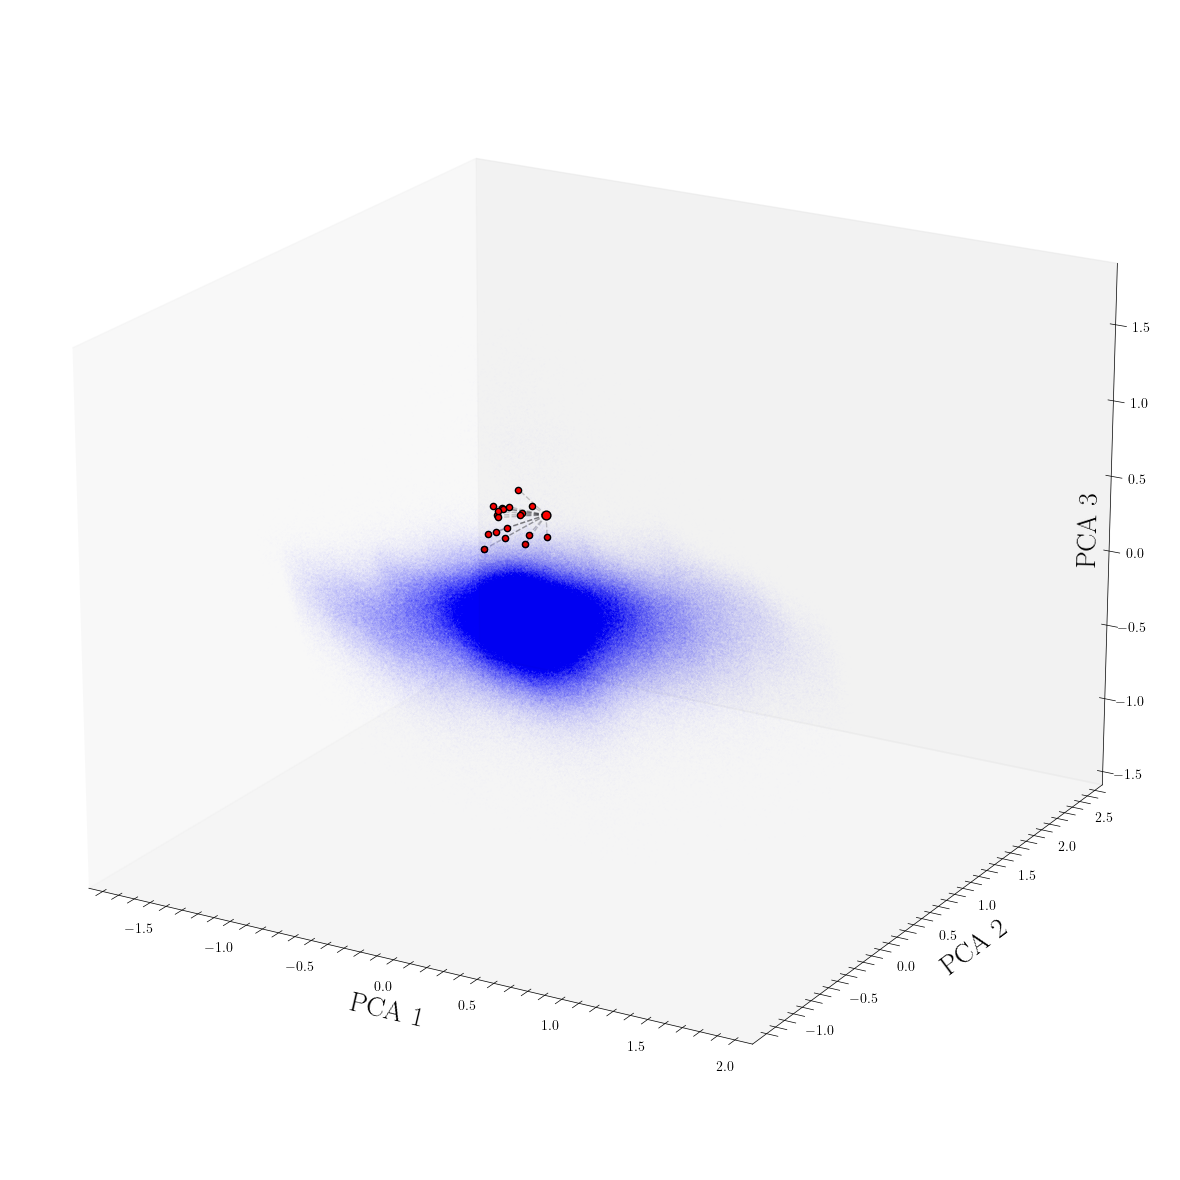

In [12]:
ax = plt.figure(figsize=(12,12)).add_subplot(projection='3d')

clst6_nn = pca[df[df["cluster"] == 6].index, :]
clst6 = df[df["cluster"] == 6]
clst6["rl"] = recon_losses[df[df["cluster"] == 6].index]
clst6["name"] = data.loc[clean_objs.iloc[df[df["cluster"] == 6].index, :].index, :]["fullDesignation"].values
clst6["e"] = clean_objs.iloc[df[df["cluster"] == 6].index, :]["e"].values
clst6 = clst6.sort_values(by="rl")


ax.scatter3D(
        clst6_nn[0, 0], 
        clst6_nn[0, 1],
        zs=clst6_nn[0, 2],
        c="red",
        edgecolor="black",
        s=40
    )

for i, name, e in zip(range(1,20), clst6["name"], clst6["e"]):
    ax.plot(
        [clst6_nn[0, 0], clst6_nn[i, 0]], 
        [clst6_nn[0, 1], clst6_nn[i, 1]],
        zs=[clst6_nn[0, 2], clst6_nn[i, 2]],
        c="black",
        alpha=.2,
        ls="--"
        )
    ax.scatter3D(
        clst6_nn[i, 0], 
        clst6_nn[i, 1],
        zs=clst6_nn[i, 2],
        c="r",
        edgecolor="black",
    )

ax.scatter(pca[:, 0], pca[:, 1], zs=pca[:, 2],alpha=.05,
    s=.001,
    marker="o",
    c="blue",
    )

ax.view_init(elev=20., azim=-60, roll=0)



ax.grid(True)
ax.set_facecolor("white")

plt.tight_layout()
plt.tight_layout()

ax.grid(False)
ax.set_xlabel('PCA 1', fontsize=20, labelpad=5)
ax.set_ylabel('PCA 2', fontsize=20, labelpad=5)
ax.set_zlabel('PCA 3', fontsize=20, labelpad=-30)

#plt.savefig("ISO_network_pca.png", dpi=300)
plt.show()

In [13]:
data.loc[clean_objs.iloc[np.argsort(recon_losses)[-10::][::-1], :].index, :]["q"].max()

5.847294294950474

Cluster 10

In [14]:
clean_objs.iloc[df[df["cluster"] == 10].index, :]#["incl"]

flags    g_Chi2          g_G12      g_G12Err        g_H  \
104881      66  0.899406 -341387.160000  2.498788e+11  38.219040   
615842    2114  1.148757      55.657726  1.315418e+02  28.838821   
884025      66  1.927554   -4655.166000  1.972120e+09  40.040550   
1058549   2114  1.238892       5.558742  1.036118e+01  23.738276   
1625147     66  1.373680  -76353.310000  2.416536e+10  36.975708   
2226418     66  1.587133 -417848.470000  3.169982e+11  34.993618   
2554344     66  0.694146  -85314.414000  1.774977e+10  36.427654   
2671142   2114  1.203739       9.701193  2.194556e-04  24.308092   
2900157     66  0.589963 -765694.300000  8.360791e+11  39.547104   
3011264     66  0.709777  -24793.890000  1.354619e+09  37.475647   
3115827   2114  0.296883       1.564085  1.192993e+01  23.155235   
3163199   2114  1.474565 -763889.700000  5.700994e+11  38.261612   
3213075     66  0.789608  -34981.992000  2.741814e+10  34.429077   
3529044     66  0.646809  -34344.996000  4.576649e+09  37.737324   
3608306     66  1.751225  -23779.428000  3.978882e+09  34.682613   
3832419   2114  0.207869      10.247574  2.092554e+00  24.744644   
3861637   2114  0.537506      -0.759307  1.071331e+01  24.184938   
3938451   2114  1.463088  -40694.630000  6.132238e+09  40.273132   
3998482     66  1.972916  -48770.816000  8.069285e+09  35.850410   
4054080     66  0.616807 -183272.140000  1.002613e+11  36.796757   

               g_HErr    i_Chi2         i_G12      i_G12Err        i_H  ...  \
104881   8.050334e+05  0.800775 -8.093015e+04  1.271962e+10  37.920116  ...   
615842   2.269747e+00  0.347762  2.887142e+07  3.402642e+13  37.108288  ...   
884025   4.672897e+05  1.097697 -2.215615e+04  9.060488e+09  38.487500  ...   
1058549  1.670051e+00  1.175041 -8.657574e+04  9.322144e+09  35.605038  ...   
1625147  3.474468e+05  0.569005 -3.861373e+05  1.501240e+11  39.579730  ...   
2226418  8.382416e+05  0.675385 -2.586181e+05  1.010888e+11  35.131725  ...   
2554344  2.281727e+05  0.486915 -7.074669e+04  1.966789e+10  36.346294  ...   
2671142  1.755767e+00  1.037869 -6.172319e+04  8.336627e+09  35.092740  ...   
2900157  1.197674e+06  1.935119  7.372268e+04  1.386330e+09  36.241130  ...   
3011264  6.000131e+04  1.449192 -7.988212e+04  1.542675e+10  36.450214  ...   
3115827  1.367835e+00  0.827430 -3.947705e+04  4.499319e+09  36.638180  ...   
3163199  8.177098e+05  0.734485 -6.708091e+05  4.825228e+11  35.660250  ...   
3213075  8.587312e+05  1.801134 -1.977847e+04  2.802686e+09  35.659515  ...   
3529044  1.463752e+05  1.105308  5.293949e+05  1.622537e+11  38.121506  ...   
3608306  1.836868e+05  3.018282 -9.801379e+04  5.364313e+10  35.566750  ...   
3832419  1.505068e+00  1.043965 -2.059222e+05  1.040409e+11  37.306087  ...   
3861637  4.397489e+00  0.818530 -2.460713e+05  6.929906e+10  33.410110  ...   
3938451  1.664373e+05  2.624219 -8.236306e+05  7.604047e+11  37.091736  ...   
3998482  1.820569e+05  1.205175 -1.612156e+05  5.351737e+10  35.969265  ...   
4054080  5.993657e+05  0.808579 -9.797104e+04  3.020631e+10  35.556618  ...   

               peri        node    mpcH         a        i-z       g-r  \
104881    69.388618  152.179950  24.690  2.709550  13.513732  2.114210   
615842    45.573235  301.739680  23.870  2.646569  13.067312 -9.164719   
884025    79.476429  212.866110  27.800  1.244279  15.164350 -0.912590   
1058549  118.214779  221.919940  23.410  2.529301  11.995716 -0.075983   
1625147  172.932718  172.938179  24.910  2.272412  13.432286  1.099378   
2226418  144.539605  160.663962  24.683  2.955640  10.476263 -0.095299   
2554344   33.418035  230.345550  23.860  2.275360  15.366409  1.786914   
2671142  140.147597  204.655341  24.350  2.216840  -2.165023 -0.574406   
2900157  165.399369  163.194856  24.057  2.639055  12.330457  1.126904   
3011264  136.278714  160.405220  24.005  2.399177  11.614666  1.371457   
3115827   49.782659  268.616930  23.090  2.750648  13.260603 -3.845879   
3163199   51.970596  289.870150 

Cluster 7

In [32]:
data.loc[clean_objs.iloc[df[df["cluster"] == 7].index, :].index, :]["fullDesignation"]

120122      2011 LPCC2232
152544     2011 S000004Ma
636997     2011 S000002fa
1369289     2011 LPCC3251
1893993     2011 1999 YN4
1936826      2011 2000 KB
2286376     2011 LPCC3684
2374646     2011 LPCC4755
2525687      2011 1987 QA
2560853    2011 1998 FH74
2774214      2011 1951 SX
2852657     2011 LPCC2613
2869753     2011 2005 GL9
3069427     2011 2005 LG8
3165286      2011 2000 OG
3236653    2011 S000008Da
3264608    2011 S000004Ta
3719402     2011 LPCC3750
4072577     2011 LPCC1712
4194501      2011 1985 PA
Name: fullDesignation, dtype: object

Cluster 8

In [18]:
clean_objs.iloc[df[df["cluster"] == 8].index, :].describe()

flags     g_Chi2      g_G12   g_G12Err        g_H     g_HErr  \
count    20.0  20.000000  20.000000  20.000000  20.000000  20.000000   
mean   2114.0   1.108135   0.615032   0.574120  16.579741   0.115409   
std       0.0   0.430097   0.488898   0.311895   0.512393   0.049615   
min    2114.0   0.478285   0.101176   0.210151  15.456729   0.046720   
25%    2114.0   0.836351   0.231609   0.364946  16.298507   0.080797   
50%    2114.0   1.048020   0.423384   0.477469  16.654674   0.096404   
75%    2114.0   1.325920   0.991418   0.751072  16.880693   0.139155   
max    2114.0   2.131669   1.607451   1.297059  17.390562   0.242931   

          i_Chi2      i_G12   i_G12Err        i_H  ...        peri  \
count  20.000000  20.000000  20.000000  20.000000  ...   20.000000   
mean    1.061735   0.793765   0.665326  16.018072  ...   86.293880   
std     0.355340   0.709148   0.424151   0.456831  ...   56.086689   
min     0.352826  -0.288150   0.253614  14.883480  ...    5.085427   
25%     0.902344   0.269419   0.380551  15.786669  ...   30.324669   
50%     1.029021   0.588298   0.606598  16.059629  ...   75.249382   
75%     1.210040   1.208579   0.748332  16.347742  ...  136.094179   
max     1.870425   2.604219   2.113019  16.683037  ...  201.804845   

             node       mpcH        i-z        g-r        r-i         a*  \
count   20.000000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean   133.622038  16.026500  -0.285719   0.508794   0.052875  -0.093380   
std     51.054513   0.459247   0.679936   0.083622   0.119304   0.106328   
min     66.697000  15.000000  -2.272012   0.375708  -0.282917  -0.283234   
25%     88.696500  15.777500  -0.250943   0.449610   0.008659  -0.160996   
50%    124.577883  16.110000  -0.020561   0.506150   0.076970  -0.072951   
75%    172.072750  16.297500   0.053341   0.542078   0.126278  -0.026216   
max    234.523000  16.710000   0.348348   0.690475   0.228088   0.101211   

                a            Q      T_jup  
count   20.000000    20.000000  20.000000  
mean    47.295386    89.769786   2.376102  
std    161.168829   322.114736   1.480708  
min      5.145318     5.242992  -2.396188  
25%      5.173603     5.492752   2.793634  
50%      5.204287     5.626999   2.876801  
75%      5.249373     5.839948   2.903700  
max    721.610957  1437.374620   2.959945  

[8 rows x 35 columns]

In [22]:
clean_objs.iloc[df[df["cluster"] == 8].index, :][clean_objs.iloc[df[df["cluster"] == 8].index, :]["Q"] > 10]#.describe()

flags    g_Chi2     g_G12  g_G12Err        g_H    g_HErr    i_Chi2  \
212306    2114  1.978928  0.200003  0.885451  15.512159  0.202628  1.591640   
2748717   2114  1.434909  0.211117  0.862326  15.456729  0.156133  1.011393   

            i_G12  i_G12Err        i_H    i_HErr  i_Ndata    r_Chi2     r_G12  \
212306   0.200003  0.623344  14.883480  0.125043       14  1.458944  0.200003   
2748717  2.604219  2.113019  15.266074  0.292348       14  1.682804  0.200001   

         r_G12Err        r_H    r_HErr    z_Chi2     z_G12   z_G12Err  \
212306   0.570716  15.007925  0.124766  1.142421  0.487470   1.151098   
2748717  0.619752  14.983157  0.123215  0.299646  9.327088  43.926560   

                q         e        z_H    z_HErr        incl        peri  \
212306   4.403575  0.966285  14.891091  0.175548  160.781248   68.536038   
2748717  5.847294  0.991897  15.737228  3.388040  119.030473  201.804845   

               node  mpcH       i-z       g-r       r-i        a*           a  \
212306   216.683004  15.0 -0.007611  0.504234  0.124445 -0.065231  130.612040   
2748717  122.478766  15.0 -0.471154  0.473572 -0.282917 -0.275834  721.610957   

                   Q     T_jup  
212306    256.820504 -2.396188  
2748717  1437.374620 -1.444766

In [21]:
print(data.loc[clean_objs.iloc[df[df["cluster"] == 8].index, :].index, :]["fullDesignation"])

174079     2011 St500lcCa
186592     2011 St500aKWa
212306      2011 LPCC1411
254930     2011 St500b2Ka
665894     2011 St500gUla
1066990    2011 St500daCa
1402302    2011 St500dVba
1928102    2011 St500fuNa
2059919    2011 St500ahta
2078346    2011 St500iaVa
2086347    2011 St500kdMa
2748717     2011 LPCD1330
3020942    2011 St500ggma
3050269    2011 St500fS1a
3052517    2011 St500fcOa
3075674    2011 St500eW8a
3232253    2011 St5009mEa
3814386    2011 St500ecWa
4054896    2011 St500aATa
4137673    2011 St500hVTa
Name: fullDesignation, dtype: object


Cluster 2

In [39]:
pd.set_option('display.max_columns', None)
#print(data.loc[clean_objs.iloc[df[df["cluster"] == 2].index, :].index, :]["fullDesignation"])
clean_objs.iloc[df[df["cluster"] == 2].index, :].describe()

flags     g_Chi2       g_G12     g_G12Err        g_H     g_HErr  \
count   20.0  20.000000   20.000000    20.000000  20.000000  20.000000   
mean    66.0   0.966632   12.228911    67.417085  24.846741   1.920123   
std      0.0   0.468617   36.050978   247.588026   1.466844   1.254696   
min     66.0   0.207243   -1.504089     0.942083  22.468704   0.754730   
25%     66.0   0.614852    0.568276     4.677179  23.810040   1.221477   
50%     66.0   0.932307    3.563301     9.102287  24.738376   1.496220   
75%     66.0   1.410703    7.737578    12.059541  25.978843   2.025305   
max     66.0   1.757976  164.056080  1117.274800  28.033096   5.186626   

          i_Chi2         i_G12      i_G12Err        i_H         i_HErr  \
count  20.000000  2.000000e+01  2.000000e+01  20.000000      20.000000   
mean    1.155247  1.600139e+05  6.548669e+10  35.276536  185441.795800   
std     0.589226  9.965042e+05  2.339053e+11   1.859018  129786.889482   
min     0.389248 -3.225086e+05  4.920405e+08  32.252857   16751.960000   
25%     0.635668 -8.292077e+04  2.776300e+09  34.134259   78509.825000   
50%     1.068593 -3.181193e+04  5.066734e+09  35.686495  180320.510000   
75%     1.663626 -2.039538e+04  2.319241e+10  36.110545  266814.067500   
max     2.264159  4.381610e+06  1.056366e+12  40.755558  420805.940000   

         i_Ndata     r_Chi2          r_G12      r_G12Err        r_H  \
count  20.000000  20.000000      20.000000  2.000000e+01  20.000000   
mean   14.500000   1.103684  -35090.850257  1.001067e+10  32.410792   
std     4.861232   0.483259   47030.989858  2.141945e+10   3.717166   
min     8.000000   0.097779 -179290.440000  7.048621e-02  23.700666   
25%    10.000000   0.801984  -40141.690750  7.678702e+07  31.643510   
50%    13.500000   1.094518  -19507.613000  7.730274e+08  32.813885   
75%    18.250000   1.384931   -5601.837250  5.146203e+09  34.167714   
max    26.000000   2.012700       5.887376  7.727586e+10  40.419060   

              r_HErr     z_Chi2         z_G12      z_G12Err          q  \
count      20.000000  20.000000  2.000000e+01  2.000000e+01  20.000000   
mean   136715.499068   0.897467  3.892427e+06  2.262516e+12   1.488657   
std    185847.954253   0.334500  1.703424e+07  9.407302e+12   0.448438   
min         1.232687   0.225273 -6.698374e+05  4.967389e+09   0.531425   
25%     16873.821250   0.717093 -1.826097e+05  2.599354e+10   1.278440   
50%     53210.046500   0.873961 -1.142666e+05  6.718380e+10   1.582487   
75%    151742.492500   1.029042 -4.773754e+04  1.039699e+11   1.808945   
max    634993.100000   1.602006  7.610640e+07  4.219848e+13   2.068381   

               e        z_H         z_HErr       incl        peri        node  \
count  20.000000  20.000000      20.000000  20.000000   20.000000   20.000000   
mean    0.410074  36.261873  447260.528500  13.126667  105.984119  180.393232   
std     0.170238   2.059465  170768.905873   6.063206   40.292183   54.439887   
min     0.233066  33.020660  249199.440000   6.849810   53.382594   75.410060   
25%     0.277464  34.665409  294321.990000   8.213688   72.223447  147.014070   
50%     0.345146  36.039270  382809.795000  11.326730  103.388419  194.467990   
75%     0.483975  37.764148  593831.297500  16.225544  132.912519  216.118826   
max     0.791270  40.233345  755456.060000  27.489127  189.764461  270.909280   

            mpcH        i-z        g-r        r-i         a*          a  \
count  20.000000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean   23.597550  -0.985337  -7.564052  -2.865743  -8.591590   2.549230   
std     0.980746   1.796657   3.024214   3.896535   1.515149   0.403379   
min    22.420000  -4.534185 -12.385964 -12.430054 -11.744932   1.603284   
25%    22.865000  -2.485438  -9.651026  -3.910594  -9.484477   2.332906   
50%    23.500000  -0.794084  -7.952917  -1.271030  -8.716211   2.590684   
75%    24.028750   0.306057  -5.880331  -0.492187  -7.476563   2.731842   
max    26.280000   2.514279  -1.2319

Cluster 7

In [19]:
clean_objs.iloc[df[df["cluster"] == 7].index, :].describe()

flags       g_Chi2      g_G12   g_G12Err        g_H     g_HErr  \
count   20.0    20.000000  20.000000  20.000000  20.000000  20.000000   
mean    66.0  1122.927320  -0.703003   0.304232  16.853225   0.013734   
std      0.0  1275.998560   8.819768   1.250704   1.124572   0.034895   
min     66.0     2.493002 -37.093650   0.001845  14.401682   0.001049   
25%     66.0    33.072254   0.274276   0.006454  16.304367   0.002969   
50%     66.0   534.964120   0.556276   0.011629  17.003563   0.003548   
75%     66.0  2166.554225   1.375067   0.026122  17.345247   0.006251   
max     66.0  3576.403300   9.102281   5.616153  19.925402   0.158251   

             i_Chi2      i_G12   i_G12Err        i_H  ...        peri  \
count     20.000000  20.000000  20.000000  20.000000  ...   20.000000   
mean    1627.522326   0.825364   0.010944  15.969816  ...  233.150120   
std     2601.931049   0.872062   0.011118   0.719189  ...   48.495083   
min        2.428917  -1.255984   0.001465  14.752678  ...  152.694248   
25%      115.223628   0.389841   0.004028  15.444648  ...  193.709515   
50%      349.172685   0.698722   0.006482  16.102801  ...  229.558314   
75%     1925.938400   1.489926   0.014304  16.521479  ...  271.314773   
max    11001.853000   2.506925   0.048670  17.159890  ...  332.113088   

             node       mpcH        i-z        g-r        r-i         a*  \
count   20.000000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean   171.947764  15.814800  -0.094862   0.671782   0.211628   0.123119   
std     65.384466   0.748097   0.452881   0.962891   0.357533   0.864047   
min     40.973248  15.000000  -1.015437  -0.480463  -0.819171  -0.835105   
25%    131.464368  15.000000  -0.202220   0.416023   0.138306  -0.045292   
50%    181.742870  15.910000  -0.061252   0.632829   0.209894   0.093686   
75%    200.978970  16.445000  -0.012491   0.725223   0.326398   0.154580   
max    307.478200  17.252000   1.338731   4.489297   0.895595   3.503398   

                a           Q      T_jup  
count   20.000000   20.000000  20.000000  
mean     7.046013   13.441249   2.054671  
std     50.172593  100.202955   2.386947  
min   -179.994349 -360.183118  -1.370190  
25%      1.668858    2.399029  -0.633962  
50%      2.005756    3.777627   2.950311  
75%     32.179954   63.141033   3.758327  
max     74.847824  149.582768   6.261233  

[8 rows x 35 columns]

In [20]:
clean_objs.iloc[df[df["cluster"] == 7].index, :][clean_objs.iloc[df[df["cluster"] == 7].index, :]["q"] < 0.3075]

flags       g_Chi2     g_G12  g_G12Err        g_H    g_HErr  \
152544      66  1747.767800  1.465600  0.011932  17.310904  0.005030   
636997      66    35.023956  0.299034  0.011327  16.372458  0.002073   
2286376     66  1232.296400  0.200000  0.034894  15.737992  0.007523   
2560853     66   142.178700  0.154362  0.005648  16.681461  0.004722   
2852657     66   830.204400  3.693202  0.004330  14.401682  0.005327   
2869753     66   131.334720  0.909174  0.018265  17.543243  0.003018   
3069427     66   111.063286  1.683765  0.006722  17.570896  0.003017   
3264608     66    27.217146  0.307648  0.016565  17.448278  0.002931   

             i_Chi2     i_G12  i_G12Err        i_H  ...        peri  \
152544    421.70914 -0.157811  0.021204  17.031788  ...  221.268745   
636997     24.10273  0.382445  0.006263  15.547156  ...  152.694248   
2286376  1648.60850  1.578281  0.015150  15.489385  ...  243.695660   
2560853   276.63623  0.468724  0.004129  15.848385  ...  193.409878   
2852657  2091.23600  1.997243  0.002525  14.784737  ...  180.625668   
2869753    20.10127  0.884645  0.006701  16.588003  ...  162.240610   
3069427   234.58954  1.666924  0.005200  16.669773  ...  193.809394   
3264608   145.59726  0.985430  0.009367  16.616236  ...  332.113088   

               node    mpcH       i-z       g-r       r-i        a*  \
152544   185.821343  16.520  0.046095 -0.480463  0.759579 -0.655802   
636997   193.861871  15.586 -0.084112  0.634280  0.191022  0.080469   
2286376  217.391802  15.000  0.042608  0.310624 -0.062017 -0.321452   
2560853  197.540010  15.790 -0.038907  0.593324  0.239752  0.065947   
2852657  307.478200  15.000  0.345287 -0.185065 -0.197990 -0.823803   
2869753  225.593410  16.660 -0.030857  0.740390  0.214850  0.185630   
3069427  211.295850  16.790 -0.174404  0.691460  0.209663  0.139748   
3264608  108.241690  16.548 -0.132898  0.678787  0.153255  0.103085   

                  a           Q     T_jup  
152544     0.865878    1.682514  6.261233  
636997     1.837195    3.497282  3.007614  
2286376   74.847824  149.582768 -0.346809  
2560853    2.201070    4.147550  2.930584  
2852657 -179.994349 -360.183118 -0.532202  
2869753    2.139972    4.057971  2.966111  
3069427    1.755180    3.207696  3.548110  
3264608    1.496269    2.848832  3.722448  

[8 rows x 35 columns]

In [45]:
print(data.loc[clean_objs.iloc[df[df["cluster"] == 7].index, :].index, :]["fullDesignation"])


120122      2011 LPCC2232
152544     2011 S000004Ma
636997     2011 S000002fa
1369289     2011 LPCC3251
1893993     2011 1999 YN4
1936826      2011 2000 KB
2286376     2011 LPCC3684
2374646     2011 LPCC4755
2525687      2011 1987 QA
2560853    2011 1998 FH74
2774214      2011 1951 SX
2852657     2011 LPCC2613
2869753     2011 2005 GL9
3069427     2011 2005 LG8
3165286      2011 2000 OG
3236653    2011 S000008Da
3264608    2011 S000004Ta
3719402     2011 LPCC3750
4072577     2011 LPCC1712
4194501      2011 1985 PA
Name: fullDesignation, dtype: object


Cluster 6

In [23]:
pd.set_option('display.max_columns', None)
print(data.loc[clean_objs.iloc[df[df["cluster"] == 6].index, :].index, :]["fullDesignation"])
clean_objs.iloc[df[df["cluster"] == 6].index, :]#.describe()

120122      2011 LPCC2232
152544     2011 S000004Ma
636997     2011 S000002fa
1369289     2011 LPCC3251
1893993     2011 1999 YN4
1936826      2011 2000 KB
2286376     2011 LPCC3684
2374646     2011 LPCC4755
2525687      2011 1987 QA
2560853    2011 1998 FH74
2774214      2011 1951 SX
2852657     2011 LPCC2613
2869753     2011 2005 GL9
3069427     2011 2005 LG8
3165286      2011 2000 OG
3236653    2011 S000008Da
3264608    2011 S000004Ta
3719402     2011 LPCC3750
4072577     2011 LPCC1712
4194501      2011 1985 PA
Name: fullDesignation, dtype: object


flags       g_Chi2      g_G12  g_G12Err        g_H    g_HErr  \
120122      66  2819.713000 -37.093650  5.616153  19.925402  0.158251   
152544      66  1747.767800   1.465600  0.011932  17.310904  0.005030   
636997      66    35.023956   0.299034  0.011327  16.372458  0.002073   
1369289     66  1956.935900   9.102281  0.072899  16.480347  0.003364   
1893993     66  3576.403300  -0.003505  0.007147  17.197922  0.006863   
1936826     66     4.213280   0.650511  0.023198  17.124620  0.003731   
2286376     66  1232.296400   0.200000  0.034894  15.737992  0.007523   
2374646     66     2.493002   0.489805  0.116023  15.597859  0.015509   
2525687     66  2795.409200   1.344890  0.006948  16.525436  0.006046   
2560853     66   142.178700   0.154362  0.005648  16.681461  0.004722   
2774214     66   239.893880   0.501259  0.005078  16.882505  0.001323   
2852657     66   830.204400   3.693202  0.004330  14.401682  0.005327   
2869753     66   131.334720   0.909174  0.018265  17.543243  0.003018   
3069427     66   111.063286   1.683765  0.006722  17.570896  0.003017   
3165286     66     5.730621   0.380393  0.020815  17.188871  0.003164   
3236653     66   830.034360   1.704637  0.003857  18.008600  0.002372   
3264608     66    27.217146   0.307648  0.016565  17.448278  0.002931   
3719402     66    26.653555   0.611294  0.007411  15.703081  0.002982   
4072577     66  2826.623500  -1.479586  0.093577  17.262856  0.036380   
4194501     66  3117.356400   1.018822  0.001845  16.100094  0.001049   

               i_Chi2     i_G12  i_G12Err        i_H    i_HErr  i_Ndata  \
120122      19.384430 -0.040774  0.018898  15.262941  0.011332       34   
152544     421.709140 -0.157811  0.021204  17.031788  0.018331       57   
636997      24.102730  0.382445  0.006263  15.547156  0.001111      111   
1369289   3455.008800  0.392306  0.012412  15.310436  0.002634       12   
1893993   1833.632900  0.124449  0.005320  16.170206  0.005723       39   
1936826      4.005602  0.456475  0.024992  16.271500  0.003448       94   
2286376   1648.608500  1.578281  0.015150  15.489385  0.001951       22   
2374646  11001.853000  0.984609  0.006765  16.300713  0.003173       26   
2525687   5101.395000  1.460474  0.003483  15.758666  0.003114       19   
2560853    276.636230  0.468724  0.004129  15.848385  0.000837      120   
2774214    182.866030  0.469943  0.003723  16.035395  0.001021       91   
2852657   2091.236000  1.997243  0.002525  14.784737  0.002130       29   
2869753     20.101270  0.884645  0.006701  16.588003  0.002319      119   
3069427    234.589540  1.666924  0.005200  16.669773  0.001935       87   
3165286      2.428917  0.512800  0.014022  16.347368  0.002766      106   
3236653    217.989970  1.729882  0.003258  17.159890  0.002255       63   
3264608    145.597260  0.985430  0.009367  16.616236  0.001961       78   
3719402   1870.839200  2.506925  0.005325  14.752678  0.003035       30   
4072577   1649.134400 -1.255984  0.048670  16.499304  0.020578       31   
4194501   2349.327600  1.360303  0.001465  14.951750  0.001186       39   

               r_Chi2     r_G12  r_G12Err        r_H    r_HErr       z_Chi2  \
120122     433.557560  0.933657  0.006141  15.436105  0.001095  3260.993200   
152544     735.201600 -0.860275  0.041332  17.791367  0.023030   208.329740   
636997      34.412550  0.409288  0.005765  15.738178  0.000978    16.700146   
1369289   8331.713000  0.747692  0.011431  15.937106  0.001707  4691.726000   
1893993   6363.926300  0.116820  0.003417  16.440218  0.003601   484.598480   
1936826      8.475854  0.633767  0.016269  16.472380  0.002486     2.130524   
2286376    554.485900 -0.097235  0.004585  15.427368  0.001301  1045.498800   
2374646   4833.606400  1.536986  0.003296  15.481542  0.002588     2.609973   
2525687  11828.251000  1.392630  0.003442  16.061878  0.002887   133.622600   
2560853    438.169740  0.181822  0.002806  16.088137  0.002486    95.452110   
2774214   2893.228800  0.13618

Cluster 9

In [201]:
data.loc[clean_objs.iloc[df[df["cluster"] == 9].index, :].index, :][["fullDesignation", "q", "e", "incl", "a", "i_H", "i_HErr"]].describe()


q          e        incl           a        i_H     i_HErr
count  20.000000  20.000000   20.000000   20.000000  20.000000  20.000000
mean    1.594246   0.967269  149.290769   85.210488  15.215515   0.012064
std     0.789058   0.023681   27.620461  107.731405   0.222102   0.014370
min     0.159622   0.928829   91.846238   34.096760  14.952848   0.001770
25%     0.904539   0.951923  137.345132   41.928878  15.070812   0.002978
50%     1.997049   0.961902  156.002554   46.909606  15.163199   0.006601
75%     2.219630   0.987908  170.185028   55.918668  15.271452   0.013210
max     2.459272   0.997023  179.000327  427.244838  15.764768   0.053573

Cluster 8

In [24]:
# Designations
print(data.loc[clean_objs.iloc[df[df["cluster"] == 8].index, :].index, :]["fullDesignation"])

174079     2011 St500lcCa
186592     2011 St500aKWa
212306      2011 LPCC1411
254930     2011 St500b2Ka
665894     2011 St500gUla
1066990    2011 St500daCa
1402302    2011 St500dVba
1928102    2011 St500fuNa
2059919    2011 St500ahta
2078346    2011 St500iaVa
2086347    2011 St500kdMa
2748717     2011 LPCD1330
3020942    2011 St500ggma
3050269    2011 St500fS1a
3052517    2011 St500fcOa
3075674    2011 St500eW8a
3232253    2011 St5009mEa
3814386    2011 St500ecWa
4054896    2011 St500aATa
4137673    2011 St500hVTa
Name: fullDesignation, dtype: object


In [24]:
cluster8 = clean_objs.iloc[df[df["cluster"] == 8].index]

In [25]:
# This filter is from pre-examining the labels
cluster8_asteroids = cluster8[cluster8["a"] < 5.5]

In [26]:
cluster8_asteroids.describe()

flags     g_Chi2      g_G12   g_G12Err        g_H     g_HErr  \
count    18.0  18.000000  18.000000  18.000000  18.000000  18.000000   
mean   2114.0   1.041604   0.660529   0.540812  16.701441   0.108301   
std       0.0   0.388810   0.495198   0.311386   0.369491   0.046398   
min    2114.0   0.478285   0.101176   0.210151  16.154678   0.046720   
25%    2114.0   0.771783   0.304519   0.346519  16.347494   0.080316   
50%    2114.0   1.003418   0.472267   0.473786  16.691375   0.094813   
75%    2114.0   1.236177   1.089726   0.529924  16.910510   0.122611   
max    2114.0   2.131669   1.607451   1.297059  17.390562   0.242931   

          i_Chi2      i_G12   i_G12Err        i_H     i_HErr     i_Ndata  \
count  18.000000  18.000000  18.000000  18.000000  18.000000   18.000000   
mean    1.035093   0.726171   0.587231  16.122883   0.119894   37.000000   
std     0.351715   0.586233   0.266880   0.335599   0.051903   21.174346   
min     0.352826  -0.288150   0.253614  15.575965   0.044754   10.000000   
25%     0.898225   0.313642   0.376642  15.855257   0.079452   27.000000   
50%     1.029021   0.588298   0.566132  16.097749   0.115358   32.000000   
75%     1.185257   1.111314   0.729382  16.404337   0.144538   42.000000   
max     1.870425   2.092808   1.235241  16.683037   0.225698  101.000000   

          r_Chi2      r_G12   r_G12Err        r_H     r_HErr     z_Chi2  \
count  18.000000  18.000000  18.000000  18.000000  18.000000  18.000000   
mean    1.065167   0.504114   0.359645  16.190437   0.070103   1.233861   
std     0.208813   0.222859   0.160436   0.332523   0.032096   0.694235   
min     0.606902   0.200002   0.192850  15.740170   0.030715   0.277805   
25%     1.029936   0.289969   0.269178  15.867744   0.048367   0.840087   
50%     1.105371   0.512374   0.297667  16.227434   0.056848   1.030506   
75%     1.153132   0.675567   0.416532  16.375527   0.087319   1.494121   
max     1.501931   0.863183   0.807291  16.810928   0.160586   3.180899   

           z_G12    z_G12Err          q          e        z_H     z_HErr  \
count  18.000000   18.000000  18.000000  18.000000  18.000000  18.000000   
mean    4.379227   15.526727   4.787158   0.080367  16.413750   0.803790   
std     9.980336   38.396019   0.263281   0.047169   0.821221   1.094393   
min    -0.945239    0.399190   4.314516   0.011459  15.553645   0.164393   
25%     0.045560    0.982229   4.612447   0.042275  16.048979   0.273585   
50%     0.200004    1.831364   4.803163   0.077001  16.164459   0.355452   
75%     1.804733    4.456368   5.010393   0.113848  16.480714   0.640335   
max    36.932446  138.083500   5.154882   0.169079  18.521341   3.801807   

            incl        peri        node       mpcH        i-z        g-r  \
count  18.000000   18.000000   18.000000  18.000000  18.000000  18.000000   
mean   20.354317   80.863151  129.626611  16.140556  -0.290867   0.511004   
std     7.161385   51.779864   49.831519   0.313021   0.714214   0.087954   
min    11.480700    5.085427   66.697000  15.670000  -2.272012   0.375708   
25%    15.892925   29.184706   88.597500  15.850000  -0.156670   0.443937   
50%    17.878200   75.249382  121.396500  16.165000  -0.020561   0.518708   
75%    24.480600  130.962602  164.132250  16.332500   0.074448   0.558054   
max    40.580900  161.063802  234.523000  16.710000   0.348348   0.690475   

             r-i         a*          a          Q      T_jup  
count  18.000000  18.000000  18.000000  18.000000  18.000000  
mean    0.067554  -0.084807   5.204707   5.622256   2.853499  
std     0.093519   0.102729   0.042623   0.231338   0.103273  
min    -0.110990  -0.283234   5.145318   5.242992   2.516874  
25%     0.015736  -0.152048   5.171984   5.488218   2.816427  
50%     0.076970  -0.071604   5.197619   5.573985   2.894893  
75%     0.125673  -0.024137   5.231699   5.794981   2.903942  
max     0.228088   0.101211   5.286394   6.070381   2.959945

In [75]:
cluster8_comets = cluster8[cluster8["a"] > 5.5]

In [93]:
cluster8_comets

flags    g_Chi2     g_G12  g_G12Err        g_H    g_HErr    i_Chi2  \
212306    2114  1.978928  0.200003  0.885451  15.512159  0.202628  1.591640   
2748717   2114  1.434909  0.211117  0.862326  15.456729  0.156133  1.011393   

            i_G12  i_G12Err        i_H    i_HErr  i_Ndata    r_Chi2     r_G12  \
212306   0.200003  0.623344  14.883480  0.125043       14  1.458944  0.200003   
2748717  2.604219  2.113019  15.266074  0.292348       14  1.682804  0.200001   

         r_G12Err        r_H    r_HErr    z_Chi2     z_G12   z_G12Err  \
212306   0.570716  15.007925  0.124766  1.142421  0.487470   1.151098   
2748717  0.619752  14.983157  0.123215  0.299646  9.327088  43.926560   

                q         e        z_H    z_HErr        incl        peri  \
212306   4.403575  0.966285  14.891091  0.175548  160.781248   68.536038   
2748717  5.847294  0.991897  15.737228  3.388040  119.030473  201.804845   

               node  mpcH       i-z       g-r       r-i        a*           a  \
212306   216.683004  15.0 -0.007611  0.504234  0.124445 -0.065231  130.612040   
2748717  122.478766  15.0 -0.471154  0.473572 -0.282917 -0.275834  721.610957   

                   Q     T_jup  
212306    256.820504 -2.396188  
2748717  1437.374620 -1.444766

In [27]:
trojans = clean_objs[(clean_objs["a"] < 5.21) & (clean_objs["a"] > 5.19)].describe()

In [92]:
np.sort(clean_objs[(clean_objs["a"] < 5.21) & (clean_objs["a"] > 5.19)]["incl"])[-100::]

array([44.6231, 44.6383, 45.3936, 45.471 , 45.6202, 46.3295, 49.4216,
       49.4753, 49.5064, 49.5393, 49.5923, 50.0501, 50.4828, 50.5099,
       50.6012, 50.9371, 50.9464, 51.2102, 51.3299, 51.7033, 51.7237,
       51.8048, 51.9209, 52.0078, 52.0282, 52.0642, 52.1157, 52.1735,
       52.1925, 52.2177, 52.3257, 52.3434, 52.7504, 52.8224, 52.8614,
       53.148 , 53.2469, 53.3021, 53.3357, 53.3735, 53.5257, 53.5495,
       53.6043, 53.7957, 53.8579, 53.8926, 53.9267, 54.0398, 54.0817,
       54.3053, 54.309 , 54.3752, 54.4284, 54.4708, 54.5038, 54.5126,
       54.7201, 54.7712, 54.8129, 54.8347, 55.0952, 55.2803, 55.3203,
       55.3528, 55.4042, 55.5109, 55.5906, 55.7811, 55.7983, 55.8105,
       55.8402, 55.9307, 55.9605, 55.9606, 55.9904, 56.1998, 56.6038,
       56.6095, 56.6257, 56.6342, 56.6415, 56.6471, 56.6958, 56.6969,
       56.7724, 56.816 , 56.8936, 56.9447, 56.9734, 57.0164, 57.0332,
       57.0357, 57.2993, 57.3154, 57.3301, 57.5131, 57.5357, 57.5451,
       57.5682, 57.6

In [83]:
np.sort(trojans["i-z"])

array([-4.70657000e+00, -5.17682500e-02, -3.26222297e-02,  6.35300000e-03,
        5.28922500e-02,  2.37819359e-01,  1.63580800e+00,  1.00110000e+04])

In [80]:
cluster8_asteroids.describe() - trojans

flags       g_Chi2        g_G12     g_G12Err          g_H  \
count -9993.000000 -9993.000000 -9993.000000 -9993.000000 -9993.000000   
mean   2035.111777    -2.227443     0.026200     0.242303     1.011244   
std    -161.961707   -20.756983     0.094368    -0.054454    -0.741100   
min    2048.000000     0.365146     3.142076     0.207783     7.313011   
25%    2048.000000    -0.173088    -0.086072     0.221867     1.159913   
50%    2048.000000    -0.158468    -0.143939     0.234435     0.666787   
75%    2048.000000    -0.266667     0.306756     0.143200     0.497627   
max       0.000000  -873.285571    -7.232468   -13.440249    -1.504338   

            g_HErr       i_Chi2        i_G12     i_G12Err          i_H  \
count -9993.000000 -9993.000000 -9993.000000 -9993.000000 -9993.000000   
mean      0.050883    -1.060427     0.082627     0.294533     1.020430   
std      -0.012608    -8.393491     0.101649    -0.603923    -0.773692   
min       0.046407     0.286767     7.292350     0.251111     7.313697   
25%       0.055867    -0.056721    -0.133309     0.268154     1.256385   
50%       0.047414    -0.075890    -0.036024     0.349285     0.656640   
75%       0.047021    -0.125868     0.346475     0.370550     0.582386   
max      -2.432357  -273.898875   -25.592042   -67.068325    -2.484497   

            i_HErr      i_Ndata       r_Chi2        r_G12     r_G12Err  \
count -9993.000000 -9993.000000 -9993.000000 -9993.000000 -9993.000000   
mean      0.065420   -45.812706    -1.961974    -0.122177     0.184149   
std      -0.025187   -39.258714   -15.608393    -0.079918    -0.234925   
min       0.044304     5.000000     0.225790     2.140708     0.190848   
25%       0.059005   -23.000000     0.033832    -0.200731     0.192809   
50%       0.072857   -42.000000    -0.048150    -0.115793     0.147411   
75%       0.074323   -59.000000    -0.261977    -0.061750     0.184797   
max      -3.679647  -862.000000  -428.312099   -15.296781   -34.395983   

               r_H       r_HErr       z_Chi2        z_G12      z_G12Err  \
count -9993.000000 -9993.000000 -9993.000000 -9993.000000  -9993.000000   
mean      0.973387     0.037479    -0.258007     3.465923     10.307675   
std      -0.772400    -0.000615    -3.150318     3.703817   -147.753001   
min       7.367855     0.030365     0.258123   100.250905      0.395383   
25%       1.149577     0.034023    -0.023466    -0.154441      0.789116   
50%       0.665415     0.028496    -0.036280    -0.358424      1.414811   
75%       0.434882     0.043200     0.191619     0.985050      3.553938   
max      -2.209272    -1.675472   -98.789011  -341.849784 -14589.053500   

                 q            e          z_H       z_HErr         incl  \
count -9993.000000 -9993.000000 -9993.000000 -9993.000000 -9993.000000   
mean      0.021515    -0.003171     1.278675     0.606690     4.446319   
std       0.035746     0.003442    -0.346633     0.154167    -1.943078   
min       0.670930     0.010009     7.293869     0.163754    11.339000   
25%      -0.007437    -0.007986     1.452673     0.234675     6.182075   
50%       0.009198    -0.001049     0.741454     0.263807     3.442900   
75%       0.071193     0.002342     0.635393     0.449907     4.357300   
max      -0.043227    -0.130888    -3.214653   -52.842457   -17.060400   

              peri         node         mpcH          i-z          g-r  \
count -9993.000000 -9993.000000 -9993.000000 -9993.000000 -9993.000000   
mean   -104.830515   -46.617377     0.992702    -0.258245     0.037856   
std     -50.677466   -49.399402    -0.791074     0.476395     0.006038   
min       5.060786    66.643000     7.380000     2.434558     1.177721   
25%     -69.328336    -6.169000     1.200000    -0.104902     0.008415   
50%    -116.779211   -55.023500     0.665000    -0.026914     0.048366   
75%    -141.887762   -91.433750     0.462500     0.021556     0.052970   
max    -198.882790  -125.472000    -1.130000    -1.287460    -0.952550   

  

Cluster 9

In [94]:
print(data.loc[clean_objs.iloc[df[df["cluster"] == 9].index, :].index, :]["fullDesignation"])

18210      2011 LPCC1853
580734      2011 LPCC848
778670       2011 LPCC76
1101335    2011 LPCC2375
2058571    2011 LPCC2989
2123855    2011 LPCC4658
2259072    2011 LPCC2602
2455515     2011 LPCC570
2508079    2011 LPCC3564
2557085    2011 LPCC4721
2624711      2011 LPCC26
2746140    2011 LPCC4010
2788946    2011 LPCC4687
2929055    2011 LPCC3189
3500507    2011 LPCC4129
3718119    2011 LPCC2758
3908050    2011 LPCC2353
4061068    2011 LPCC1434
4292641    2011 LPCC1151
4344516    2011 LPCC2991
Name: fullDesignation, dtype: object


In [96]:
clean_objs.iloc[df[df["cluster"] == 9].index, :].describe()

flags        g_Chi2      g_G12   g_G12Err        g_H     g_HErr  \
count   20.0     20.000000  20.000000  20.000000  20.000000  20.000000   
mean    66.0   2676.655025  -0.654735   0.577259  16.144013   0.036562   
std      0.0   7944.495909   5.297127   2.160719   1.260347   0.096584   
min     66.0      0.567802 -22.485647   0.005309  15.535372   0.002445   
25%     66.0      0.993664   0.201463   0.019081  15.594127   0.005094   
50%     66.0     34.540114   0.534736   0.055056  15.730372   0.008910   
75%     66.0    230.806800   1.421155   0.142763  15.924995   0.020218   
max     66.0  27335.600000   1.835107   9.747620  21.103336   0.441245   

           i_Chi2      i_G12   i_G12Err        i_H     i_HErr    i_Ndata  \
count   20.000000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean   107.994895   0.567001   0.050685  15.215515   0.012064  25.650000   
std    165.229937   0.736565   0.076501   0.222102   0.014370  10.624079   
min      0.881649  -0.532366   0.003052  14.952848   0.001770  11.000000   
25%      9.584181   0.136136   0.014843  15.070812   0.002978  18.250000   
50%     52.064138   0.551214   0.020452  15.163199   0.006601  23.500000   
75%    118.989583   0.862382   0.068981  15.271452   0.013210  33.500000   
max    674.099900   2.177259   0.341021  15.764768   0.053573  52.000000   

            r_Chi2      r_G12   r_G12Err        r_H     r_HErr      z_Chi2  \
count    20.000000  20.000000  20.000000  20.000000  20.000000   20.000000   
mean    518.383445   0.619203   0.041703  15.309602   0.006991   70.689158   
std    1755.434577   0.801577   0.035550   0.291011   0.005651   81.261290   
min       0.827563  -1.533764   0.003899  15.090473   0.001374    0.741831   
25%       3.563911   0.256500   0.012699  15.130265   0.002506    5.277431   
50%      75.744773   0.491983   0.023618  15.232453   0.005279   48.124018   
75%     247.565245   0.961244   0.069110  15.366490   0.010206  119.638461   
max    7947.749000   2.434863   0.105630  16.397380   0.023865  288.744570   

           z_G12   z_G12Err          q          e        z_H     z_HErr  \
count  20.000000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean    0.356800   0.097999   1.594246   0.967269  15.285428   0.038371   
std     0.733322   0.131251   0.789058   0.023681   0.391427   0.066452   
min    -1.014699   0.006182   0.159622   0.928829  14.879224   0.003733   
25%     0.076741   0.032470   0.904539   0.951923  15.038214   0.006176   
50%     0.289668   0.047969   1.997049   0.961902  15.192521   0.016899   
75%     0.549318   0.120139   2.219630   0.987908  15.362633   0.036009   
max     1.836336   0.587850   2.459272   0.997023  16.521420   0.291881   

             incl        peri       node  mpcH        i-z        g-r  \
count   20.000000   20.000000  20.000000  20.0  20.000000  20.000000   
mean   149.290769  207.861281  21.312483  15.0  -0.069913   0.834411   
std     27.620461   64.092072  20.690196   0.0   0.315624   1.248207   
min     91.846238  100.270111   0.399149  15.0  -1.339712   0.283036   
25%    137.345132  164.493777   8.811236  15.0  -0.054161   0.421769   
50%    156.002554  221.938722  16.002728  15.0   0.001747   0.482205   
75%    170.185028  247.661081  24.437849  15.0   0.058396   0.599348   
max    179.000327  338.601627  89.814789  15.0   0.156585   6.012863   

             r-i         a*           a           Q      T_jup  
count  20.000000  20.000000   20.000000   20.000000  20.000000  
mean    0.094087   0.214965   85.210488  168.826730  -1.104034  
std     0.203046   1.116046  107.731405  215.500757   0.631295  
min    -0.529862  -0.410883   34.096760   65.766819  -1.780117  
25%     0.015685  -0.154151   41.928878   81.616610  -1.603280  
50%     0.115702  -0.104146   46.909606   92.777121  -1.352974  
75%     0.150329   0.043376   55.918668  110.899643  -0.701189  
max     0.632612   4.789182  427.244838  853.217839   0.054097

In [136]:
for i in range(1, 11):    
    print(clean_objs.iloc[df[df["cluster"] == i].index, :].describe())
    print(data.loc[clean_objs.iloc[df[df["cluster"] == i].index, :].index, :]["fullDesignation"])
    print("------")

       flags     g_Chi2         g_G12      g_G12Err        g_H        g_HErr  \
count   20.0  20.000000  2.000000e+01  2.000000e+01  20.000000  2.000000e+01   
mean    66.0   1.296459 -6.859294e+03  1.636350e+11  37.151981  5.618284e+05   
std      0.0   0.566964  6.950250e+05  2.692678e+11   2.768058  4.095009e+05   
min     66.0   0.421167 -5.816593e+05  1.858375e+08  33.832245  4.291813e+04   
25%     66.0   0.798389 -1.791419e+05  2.081065e+10  35.324715  3.361588e+05   
50%     66.0   1.251299 -1.343738e+05  4.265749e+10  37.190398  4.209186e+05   
75%     66.0   1.639845 -5.165506e+04  1.753757e+11  37.935974  6.033546e+05   
max     66.0   2.376375  2.886466e+06  9.056705e+11  45.602300  1.713263e+06   

          i_Chi2         i_G12      i_G12Err        i_H  ...        peri  \
count  20.000000  2.000000e+01  2.000000e+01  20.000000  ...   20.000000   
mean    1.207512  3.740525e+06  5.111106e+12  36.132480  ...  165.289830   
std     0.626623  1.692823e+07  2.250366e+13   1.71